## 1.들어가며 (데이터 전처리)

##### 링크 1: https://data.seoul.go.kr/dataList/OA-14991/S/1/datasetView.do#
##### 링크 2: https://data.seoul.go.kr/dataVisual/seoul/seoulLivingPopulation.do
##### 1) 링크1으로 들어가 생활인구 zip 파일을 받고, zip파일 안의 csv파일을 불러온다.
##### 2) 링크2에서 행정구역 코드정보를 다운로드한다.

In [34]:
# load library
import csv
from openpyxl import load_workbook as lw
import matplotlib as mp
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
f = open("./data/LOCAL_PEOPLE_DONG_202206.csv", 
        encoding = 'utf8')
data = csv.reader(f)
next(data) # 컬럼명 제거
data = list(data); print(len(data))

305280


아래의 코드는 에러가 발생한다. 형식이 다르기에 다른 방법으로 접근해야 한다.

In [3]:
# code = open("./ch11_data/행정동코드_매핑정보_20200325.xlsx", 
#         encoding = 'utf8')
# code_data = csv.reader(code)
# # 컬럼명 제거, 컬럼이 2줄이므로 x2
# next(code_data)
# next(code_data) 
# code_data = list(code_data); print(len(code_data))

In [4]:
code = lw("./data/행정동코드_매핑정보_20200325.xlsx", 
                        data_only = True) # 수식 제외 셀값만 가져오기

# 행정동코드 시트의 데이터 가져오기
code = code['행정동코드']

# 행과 열의 데이터 출력 
all_cell = []

# code 데이터를 행 단위로 가져온다.
for r in code.rows:
    r_value = [] # 빈 셀을 만든다
    
    # 행 단위로 가져온 데이터에서 셀값을 추출해 리스트에 담는다.
    for cell in r:
        r_value.append(cell.value)
    
    # 위의 과정을 반복하며 모든 데이터를 가져온다.
    all_cell.append(r_value)

# 컬럼을 제외한다.
code = all_cell[2:]
print(code)

[[1101053, '11110530', '서울', '종로구', '사직동'], [1101054, '11110540', '서울', '종로구', '삼청동'], [1101055, '11110550', '서울', '종로구', '부암동'], [1101056, '11110560', '서울', '종로구', '평창동'], [1101057, '11110570', '서울', '종로구', '무악동'], [1101058, '11110580', '서울', '종로구', '교남동'], [1101060, '11110600', '서울', '종로구', '가회동'], [1101061, '11110615', '서울', '종로구', '종로1.2.3.4가동'], [1101063, '11110630', '서울', '종로구', '종로5.6가동'], [1101064, '11110640', '서울', '종로구', '이화동'], [1101067, '11110670', '서울', '종로구', '창신1동'], [1101068, '11110680', '서울', '종로구', '창신2동'], [1101069, '11110690', '서울', '종로구', '창신3동'], [1101070, '11110700', '서울', '종로구', '숭인1동'], [1101071, '11110710', '서울', '종로구', '숭인2동'], [1101072, '11110515', '서울', '종로구', '청운효자동'], [1101073, '11110650', '서울', '종로구', '혜화동'], [1102052, '11140520', '서울', '중구', '소공동'], [1102054, '11140540', '서울', '중구', '회현동'], [1102055, '11140550', '서울', '중구', '명동'], [1102057, '11140570', '서울', '중구', '필동'], [1102058, '11140580', '서울', '중구', '장충동'], [1102059, '11140590', '서울', '중구', '광희동'],

csv에서 가져왔기 때문에 모두 자료형이 문자열이다. 따라서 자료형 변경을 해줘야 한다.

In [5]:
print(data[0])

['20220601', '00', '11350624', '17421.754099999998', '516.6827', '422.99340000000001', '705.31780000000003', '482.48430000000002', '418.18680000000001', '348.43650000000002', '464.22359999999998', '549.71069999999997', '719.30849999999998', '680.2731', '623.29999999999995', '552.31479999999999', '423.4162', '929.27350000000001', '611.31129999999996', '413.38630000000001', '584.92539999999997', '474.68259999999998', '472.49540000000002', '382.68950000000001', '511.09570000000002', '577.39520000000005', '891.16179999999997', '861.1078', '789.04899999999998', '604.15229999999997', '533.90110000000004', '1878.4782', '']


In [6]:
for row in data:
    for i in range(32):
        if i == 0 :
            row[i] = str(row[i])
        elif i <= 2:
            row[i] = int(row[i])
        else :
            row[i] = float(row[i])
            
print(data[0])

['20220601', 0, 11350624, 17421.7541, 516.6827, 422.9934, 705.3178, 482.4843, 418.1868, 348.4365, 464.2236, 549.7107, 719.3085, 680.2731, 623.3, 552.3148, 423.4162, 929.2735, 611.3113, 413.3863, 584.9254, 474.6826, 472.4954, 382.6895, 511.0957, 577.3952, 891.1618, 861.1078, 789.049, 604.1523, 533.9011, 1878.4782, '']


행정동 코드 데이터도 살펴본다. 행자부 코드는 문자열로 되어 있지만, 통계청은 int. 위에서 코드를 int로 해주었으므로 동일하게 맞춰준다.

In [7]:
print(code[0])

for row in code:
    row[1] = int(row[1])

[1101053, '11110530', '서울', '종로구', '사직동']


#### 행정동과 코드 연결
행정동 코드 목록에 있는 행정동명과 일치하지 않으면 에러 발생

In [ ]:
dong = input("행정동을 입력하세요! => ")

for row in code:
    if row[-1] == dong:
        dong_code = row[1]

print(dong, "(" , dong_code , ")" + "을 분석합니다.")

#### 전체 코드

In [21]:
# load library
import csv
from openpyxl import load_workbook as lw

# 생활인구 데이터
f = open("./ch11_data/LOCAL_PEOPLE_DONG_202206.csv", 
        encoding = 'utf8')
data = csv.reader(f)
next(data) # 컬럼명 제거
data = list(data)

# 행정동 코드 데이터
code = lw("./ch11_data/행정동코드_매핑정보_20200325.xlsx", 
                        data_only = True) # 수식 제외 셀값만 가져오기

# 행정동코드 시트의 데이터 가져오기
code = code['행정동코드']

# 행과 열의 데이터 출력 
all_cell = []

# code 데이터를 행 단위로 가져온다.
for r in code.rows:
    r_value = [] # 빈 셀을 만든다
    
    # 행 단위로 가져온 데이터에서 셀값을 추출해 리스트에 담는다.
    for cell in r:
        r_value.append(cell.value)
    
    # 위의 과정을 반복하며 모든 데이터를 가져온다.
    all_cell.append(r_value)

# 컬럼을 제외한다.
code = all_cell[2:]

# 행정동 데이터 자료형 변환
for row in data:
    for i in range(32):
        if i == 0 :
            row[i] = str(row[i])
        elif i <= 2 :
            row[i] = int(row[i])
        else :
            row[i] = float(row[i])

print("일시 자료형은?", type(data[0][0]))

# 코드 데이터 자료형 변환
for row in code:
    row[1] = int(row[1])

# 동 이름과 코드 연결            
dong = input("행정동을 입력하세요! => ")

for row in code:
    if row[-1] == dong:
        dong_code = row[1]

print(dong, "(" , dong_code , ")" + "을 분석합니다.")

일시 자료형은? <class 'str'>
핫플레이스가 있는 행정동을 입력하세요! => 연남동
연남동 ( 11440710 )을 분석합니다.


## 하위 목표 1 - 시간대별 인구 분석

##### 리스트 내포 (list comprehension)
지금까지 빈 리스트를 만들고 반복문을 사용해 데이터를 저장해왔다. 이제 한 줄로 간결하게 줄여보자!

In [22]:
# 초기값 0 지정, 24회 반복 (24시간이므로)
pop = [0 for i in range(24)]; pop

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
for row in data :
    if row[2] == dong_code:
        pop[row[1]] += row[3]
print(pop)

[596433.6638999999, 597081.0015, 598768.2003999999, 601576.2197000001, 601551.7558999999, 593404.7777000001, 582445.144, 560161.724, 521014.0299999999, 506090.98880000005, 504300.37999999995, 515942.6201, 536077.2229000002, 551870.1034999999, 563835.3826999997, 567879.0555, 564313.9719, 574041.4595, 592031.4796000001, 608135.7964999999, 598681.7679999999, 576592.4777, 565197.5040999999, 605685.6503999999]


In [24]:
# 한달 기준
pop = [i/31 for i in pop]; pop

[19239.795609677418,
 19260.677467741934,
 19315.10323870967,
 19405.684506451616,
 19404.8953516129,
 19142.08960322581,
 18788.553032258063,
 18069.733032258067,
 16806.904193548384,
 16325.515767741937,
 16267.754193548386,
 16643.31032580645,
 17292.81364193549,
 17802.261403225802,
 18188.238151612895,
 18318.67920967742,
 18203.676512903225,
 18517.46643548387,
 19097.78966451613,
 19617.283758064514,
 19312.31509677419,
 18599.75734516129,
 18232.177551612902,
 19538.24678709677]

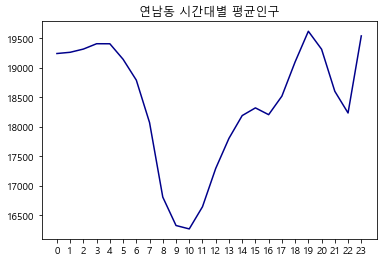

In [25]:
# 그래프 작성
plt.rc('font', family = "Malgun Gothic")
plt.title("%s 시간대별 평균인구" %dong)
plt.plot(range(24), pop, color = "darkblue")
plt.xticks(range(24), range(24))
plt.show()

## 하위 목표 2 - 주중/주말 시간대별 인구분석

In [26]:
# 오늘 요일 확인 (월-1~ 일-6)
dt.date.today().weekday()

1

In [27]:
weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        if dt.date(int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])).weekday() < 5:
            weekday[row[1]] += row[3]
        else :
            weekend[row[1]] += row[3]

# 2021년 1월의 주중/주말 일수 구하기
day_num, end_num = 0,0

for i in range(1,32):
    if dt.date(2021,1,i).weekday() < 5:
        day_num +=1
    else:
        end_num +=1
        
print("1월 주중 :", day_num, "1월 주말 :", end_num)

weekday = [w/day_num for w in weekday]
weekend = [w/end_num for w in weekend]

print("주중 인구: ", weekday)
print("주말 인구: ", weekend)

1월 주중 : 21 1월 주말 : 10
주중 인구:  [20820.715452380955, 20872.608723809528, 20940.725523809524, 21045.74980476191, 21026.11608095238, 20752.7309, 20337.21577142857, 19412.713723809524, 17860.072242857143, 17450.71424761905, 17462.510238095238, 17830.642576190476, 18426.331295238095, 18770.759076190476, 19003.80554285714, 19087.22301904762, 18815.173904761905, 19117.22594761905, 19849.531766666667, 20571.39910476191, 20436.791476190476, 19754.122780952377, 19425.17200952381, 20823.62509047619]
주말 인구:  [15919.86394, 15875.62183, 15901.29644, 15961.547379999998, 16000.331820000001, 15759.74288, 15536.361280000001, 15249.47358, 14595.25129, 13962.59896, 13758.766500000002, 14149.9126, 14912.42657, 15768.416290000003, 16475.54663, 16704.73721, 16919.53199, 17257.97146, 17519.13125, 17613.64153, 16950.9147, 16175.589929999998, 15726.889190000002, 16838.95235]


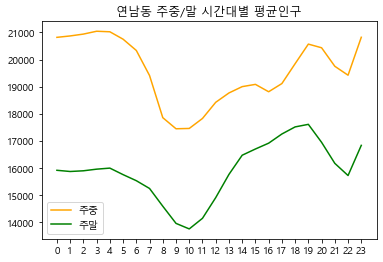

In [28]:
# 꺾은선 그래프 작성
plt.rc('font', family = "Malgun Gothic")
plt.title("%s 주중/말 시간대별 평균인구" %dong)
plt.plot(weekday, color = "Orange", label = "주중")
plt.plot(weekend, color = "Green", label = "주말")
plt.xticks(range(24), range(24))
plt.legend(loc = "best")
plt.show()

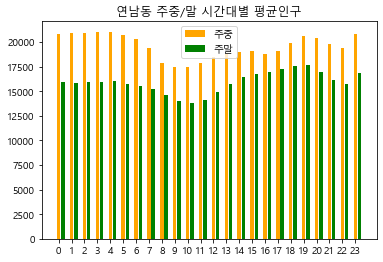

In [29]:
# 막대그래프
plt.rc('font', family = "Malgun Gothic")
plt.title("%s 주중/말 시간대별 평균인구" %dong)
plt.bar(range(0, 72, 3), weekday, color = "Orange", label = "주중")
plt.bar(range(1, 73, 3), weekend, color = "Green", label = "주말")
plt.xticks(range(0, 72, 3), range(24))
plt.legend(loc = "best")
plt.show()

## 하위목표 3 - 남녀 시간대별 평균인구

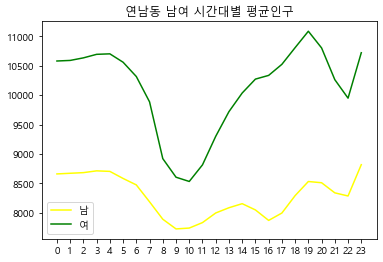

In [31]:
man = [0 for i in range(24)]
woman = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        man[row[1]] += sum(row[4:18])
        woman[row[1]] += sum(row[18:32])
        
man = [m/31 for m in man]
woman = [w/31 for w in woman]

plt.rc('font', family = "Malgun Gothic")
plt.title("%s 남여 시간대별 평균인구" %dong)
plt.plot(man, color = "Yellow", label = "남")
plt.plot(woman, color = "Green", label = "여")
plt.xticks(range(24), range(24))
plt.legend(loc = "best")
plt.show()

#### 가로 막대그래프

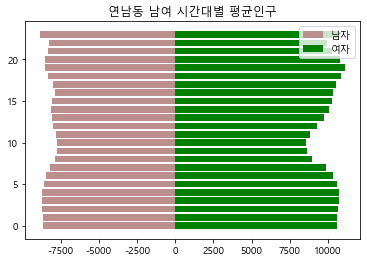

In [38]:
man = [-m for m in man]
mp.rcParams['axes.unicode_minus'] = False

plt.rc('font', family = "Malgun Gothic")
plt.title("%s 남여 시간대별 평균인구" %dong)

# 색 목록 : https://ncv.kdca.go.kr/menu.es?mid=a30401000000
plt.barh(range(24), man, color = "rosybrown", label = "남자")
plt.barh(range(24), woman, color = "Green", label = "여자")
plt.legend(loc = "best")
plt.show()

## 하위 목표 4 - 다른 지역과 인구 비교

In [40]:
# 동 이름과 코드 연결            
dong1 = input("행정동을 입력하세요! => ")

for row in code:
    if row[-1] == dong1:
        dong_code1 = row[1]

print(dong1, "(" , dong_code1 , ")" + "을 분석합니다.")

dong2 = input("비교할 행정동을 입력하세요! => ")

for row in code:
    if row[-1] == dong2:
        dong_code2 = row[1]

print(dong2, "(" , dong_code2 , ")" + "을 분석합니다.")

행정동을 입력하세요! => 대치1동
대치1동 ( 11680600 )을 분석합니다.
비교할 행정동을 입력하세요! => 대치2동
대치2동 ( 11680610 )을 분석합니다.


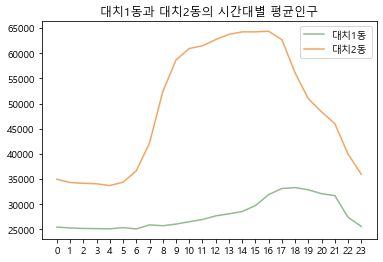

In [41]:
pop1 = [0 for i in range(24)]
pop2 = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code1:
        pop1[row[1]] += row[3]
    elif row[2] == dong_code2:
        pop2[row[1]] += row[3]
        
pop1 = [p/31 for p in pop1]
pop2 = [p/31 for p in pop2]

plt.rc('font', family = "Malgun Gothic")
plt.title("%s과 %s의 시간대별 평균인구" %(dong1, dong2))
plt.plot(pop1, color = "darkseagreen", label = "%s" %dong1)
plt.plot(pop2, color = "sandybrown", label = "%s" %dong2)
plt.xticks(range(24), range(24))
plt.legend(loc = "best")
plt.show()